### Step 2: Understanding the data

This page is allocated for understanding the data.

We will go through each feature to see nan values, outliers, and significance of information.

Upon that we will clean the data feature by feature at a time.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Following peace of code will load csv file called df_10k.

In [3]:
df_10k = pd.read_csv('data_the_babe/df_10k.csv')

In [43]:
df_10k.shape

(10000, 21)

In [44]:
df_10k.columns

Index(['Unnamed: 0', 'HCost', '_id', 'adOption', 'cohort', 'daysSinceInstall',
       'hasEnoughCoin', 'hcl', 'levelMode', 'levelNumber', 'numFails',
       'offerReason', 'percentageLeft', 'platform', 'playTime', 'playerId',
       'result', 'segments', 'sessions', 'ts', 'twentileLeft'],
      dtype='object')

***Hcost***

In [5]:
df_10k['HCost'].unique()

array([4, 6, 5])

In [6]:
df_10k['HCost'].value_counts()

5    3686
4    3289
6    3025
Name: HCost, dtype: int64

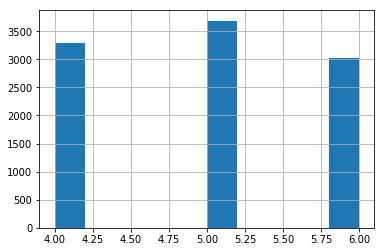

In [7]:
df_10k['HCost'].hist()

Info:
- Hcost stands for number of ingame currency demanded to continue playing, upon failure.

Conclusion:
- Create dummy variables because there are only 3 options.

Assumptions and expectations:
Number of coins to spend can be a very important feature. Certainly we will see if thats the case but I
expect a negative correlation between probability of using coins and number of demanded coins to continue.

Oh! Yet who knows! Maybe customers buying a lot of coins are more likely to spend them due to their higher disposable income which stands for positive correlation.

***_id***

In [8]:
len(df_10k['_id'].unique())

10000

In [9]:
len(df_10k['_id'].value_counts()) #Looks like each id is unique

10000

Info: _id stands for the id number of the offer. Each number is unique(randomly generated).

Conclusion: This column does not give us any information about the buyer behavior. Therefore it will be better to simply drop it.

***adOption***

In [4]:
df_10k['adOption'][0]

0

In [11]:
df_10k['adOption'].unique()

array([0, 1])

In [12]:
df_10k['adOption'].value_counts()

0    7965
1    2035
Name: adOption, dtype: int64

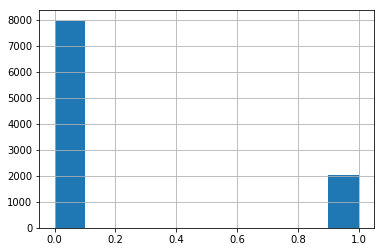

In [13]:
df_10k['adOption'].hist()

Info: adOption tells us if the adOption is included in the offer or not.

Conclusion: The feature is already boolean. There is no need for data engineering fot this one.

***cohort***

In [14]:
df_10k['cohort'][0]

"{'day': 424.0, 'week': 60.0}"

In [15]:
type(df_10k['cohort'][0])

str

In [16]:
len(df_10k['cohort'].unique())

338

In [66]:
df_10k['cohort'].value_counts().head(2)

{'day': 434.0, 'week': 62.0}    1982
{'day': 433.0, 'week': 61.0}     863
Name: cohort, dtype: int64

In [76]:
('week' in df_10k['cohort'])

False

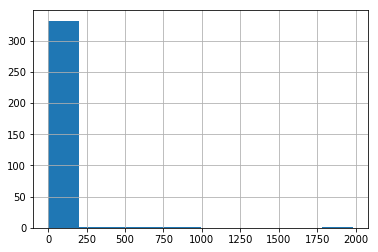

In [19]:
df_10k['cohort'].value_counts().hist()

info: I need more information about the methadology of collecting cohort information. The two recent assumptions I have about it is (1) They allocated each person before week 62 to week 62 (2) They released the game at week62 and they had a lot of people playing it within the week.

The weeks are descending through the timeline. In other words week 62 stands for 62 weeks before in timeline.

Conclusion: Have a meeting with the engineer who collected the data in order to find ways to effectively use week 62 within the analisis. I do not want to drop the columns corresponding to week 62 becauase it corresponds to 20% of whole data on average.



***daysSinceInstall***

In [20]:
df_10k['daysSinceInstall'][0]

10.0

In [21]:
type(df_10k['daysSinceInstall'][0])

numpy.float64

In [22]:
len(df_10k['daysSinceInstall'].unique())

350

In [23]:
df_10k['daysSinceInstall'].value_counts().head()

0.0    2344
1.0     734
2.0     661
3.0     342
5.0     210
Name: daysSinceInstall, dtype: int64

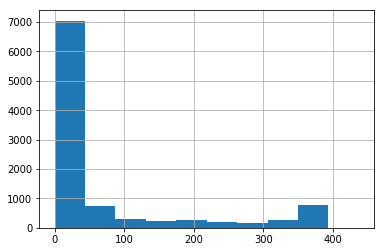

In [24]:
df_10k['daysSinceInstall'].hist()

Info: Days since install can be a very important predictor for buy, watch add and  churn decisions.

Conclusion: Slightly more than 20% of the dataponts are corresponding to day 0. Before moving forward I need to learn whether day 0 stands for the release day of the game or the first day the company began collecting data. Following that I am thinking about grouping days since install within different timeframes to create dummmy variables for each dummy variable.

***hasEnoughCoin***

In [25]:
df_10k['hasEnoughCoin'][0]

1

In [26]:
type(df_10k['hasEnoughCoin'][0])

numpy.int64

In [27]:
df_10k['hasEnoughCoin'].unique()

array([1, 0])

In [28]:
df_10k['hasEnoughCoin'].value_counts()

1    5789
0    4211
Name: hasEnoughCoin, dtype: int64

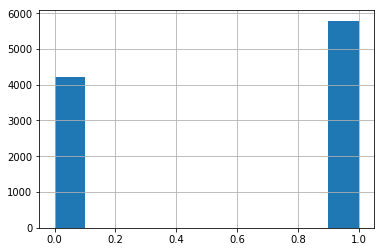

In [29]:
df_10k['hasEnoughCoin'].hist()

info: hasEnoughCoin column states if a player has enough coins to proceed or not. If they do not have enough will need to buy more to proceed.Thus such column stands for a very important indicator for the profit curve.

Conclusion: Keep it as binary and definetly this column as an important feature.

***Important Question:*** Is there any way to see if players bought more coin with real life currency. Do we have suffficient data about it?
Also ask about the ways to buy more coin.

***hcl***

In [30]:
df_10k['hcl'][0]

"{'Casual': 162, 'Ninja': 65}"

In [31]:
type(df_10k['hcl'][0])   #really? a string but not a dictionary? really?!

str

In [32]:
df_10k['hcl'].shape

(10000,)

In [33]:
type(df_10k['hcl'][9999])

str

In [34]:
df_10k['hcl'][9999]

"{'Casual': 109, 'Ninja': 2}"

In [35]:
df_10k['hcl'].value_counts().head()

{'Casual': 25}    323
{'Casual': 11}    187
{'Casual': 7}     154
{'Casual': 13}    148
{'Casual': 30}    147
Name: hcl, dtype: int64

In [36]:
df_10k['hcl'].value_counts().tail()

{'Casual': 40, 'Ninja': 188}                           1
{'Casual': 335, 'Ninja': 40}                           1
{'Casual': 338, 'Ninja': 12}                           1
{'Casual': 191, 'Ninja': 148, 'Weekly_3_Casual': 1}    1
{'Casual': 110, 'Ninja': 46}                           1
Name: hcl, dtype: int64

In [37]:
df_10k['hcl'].value_counts().tail(25)

{'Casual': 57, 'Ninja': 4}                                                         1
{'Casual': 225}                                                                    1
{'Casual': 318, 'Ninja': 333, 'NewYear_2017_Casual': 30, 'Weekly_5_Casual': 15}    1
{'Casual': 41, 'Ninja': 10}                                                        1
{'Casual': 340, 'Ninja': 148}                                                      1
{'Casual': 279, 'Ninja': 40}                                                       1
{'Casual': 74, 'Ninja': 42}                                                        1
{'Casual': 138, 'Ninja': 253}                                                      1
{'Casual': 86, 'Ninja': 18}                                                        1
{'Casual': 279, 'Ninja': 337, 'Weekly_5_Casual': 15}                               1
{'Casual': 42, 'Ninja': 29}                                                        1
{'Casual': 325, 'Ninja': 154}                                    

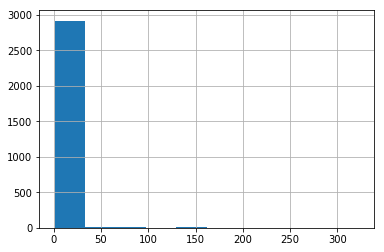

In [38]:
df_10k['hcl'].value_counts().hist()

info: data engineering for this column requires delicate thoughts due to the way it is structured. It looks like a dctionary but it is a string. Other than that the game mode is included only if a player activated the mode. Modes such as weekly are seperated within week_1,2,3... Eyeballing; most common modes are causal and ninja. 


conclusion: 
create dummy variable for game modes other than causal and ninja. (new year and weekly --> lets see if people who plays different modes use more coins or not)
For both ninja and causal keep the data but create additionak columns for both. Consider converting these strings to dict, which may ease data engineering.
Also change name of the column to game_type_count from hcl.

In [46]:
#reminder
dict_conversion_test = df_10k['hcl'][0]
dict_conversion_test

"{'Casual': 162, 'Ninja': 65}"

In [47]:
#string to dict conversion
import json
json_acceptable_string = dict_conversion_test.replace("'", "\"")
d = json.loads(json_acceptable_string)

In [48]:
d

{'Casual': 162, 'Ninja': 65}

***levelMode***

In [50]:
df_10k['levelMode'].head()

0    Casual
1    Casual
2     Ninja
3    Casual
4    Casual
Name: levelMode, dtype: object

In [53]:
df_10k['levelMode'].unique()

array(['Casual', 'Ninja'], dtype=object)

In [56]:
df_10k['levelMode'].value_counts()

Casual    8565
Ninja     1435
Name: levelMode, dtype: int64

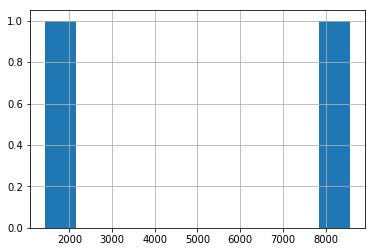

In [3]:
df_10k['levelMode'].value_counts().hist()

***levelNumber***

Info: column levelMode stands for the game mode in which player got the offer.

Conclusion: Transform this on to binary or dummy.

In [5]:
df_10k['levelNumber'].head()

0    163
1     34
2     23
3     20
4     29
Name: levelNumber, dtype: int64

In [12]:
type(df_10k['levelNumber'][0])

numpy.int64

In [7]:
df_10k['levelNumber'].value_counts().head()

12    217
4     178
14    171
31    169
30    167
Name: levelNumber, dtype: int64

In [8]:
len(df_10k['levelNumber'].unique())

333

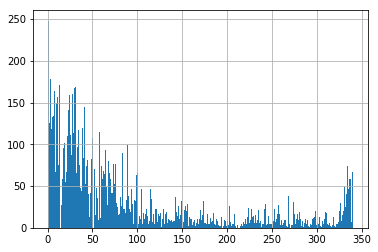

In [10]:
df_10k['levelNumber'].hist(bins = len(df_10k['levelNumber'].value_counts()))

info: column levelNumber stands for the level number in which player got the offer. A very valuable feature which may be a effective indicator to find out which levels are more challanging so players fail more. If they keep failing they are more likely to get an offeer for that level, more they fail more impatient they become which will probably  increase chances of spending in_game_currency.

Conclusion: Keep it as an integer and run the model in status quo for this column.

***numFails***

In [13]:
df_10k['numFails'].head()

0    2
1    2
2    1
3    2
4    6
Name: numFails, dtype: int64

In [14]:
type(df_10k['numFails'][0])

numpy.int64

In [16]:
df_10k['numFails'].value_counts().head()

1    2381
2    1691
3    1195
4     833
5     663
Name: numFails, dtype: int64

In [28]:
df_10k['numFails'].unique()

array([  2,   1,   6,   3,  20,   5,  31,   8,  43,   9,   4,  32,  16,
        23,  27,  12,  22,  10,  19,  21,   7,  18,  11,  13,  51,  30,
        14,  50,  24,  15,  36,  17,  68,  69,  33,  28,  78,  81,  35,
        38,  29,  57,  34,  26,  70,  37,  25,  88,  49,  46,  44,  64,
        40,  42,  62,  76,  73,  56,  59,  39,  87,  54,  60,  61, 109,
       112,  52, 122,  47, 130, 157, 163,  41,  45,  80,  71,  75,  66,
        48,  63,  58,  72])

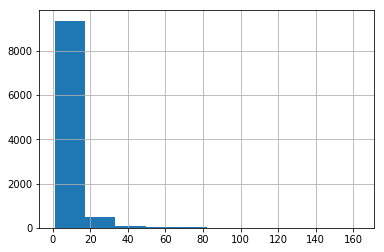

In [20]:
df_10k['numFails'].hist()

info: numFails column states how many times a player failed before offer generally or for that particular level. ***ASK***
conclusion: certainly include this feature in the model as the way it is.

'offerReason', 'percentageLeft', 'platform', 'playTime', 'playerId',
       'result', 'segments', 'sessions', 'ts', 'twentileLeft'],

***offerReason***

In [30]:
df_10k['offerReason'].head()

0    Percentage
1    Percentage
2    Percentage
3    Percentage
4    Percentage
Name: offerReason, dtype: object

In [31]:
type(df_10k['offerReason'][0])

str

In [32]:
df_10k['offerReason'].unique()

array(['Percentage', 'LevelTime', 'BoosterUsed'], dtype=object)

In [33]:
df_10k['offerReason'].value_counts()

Percentage     8968
LevelTime       891
BoosterUsed     141
Name: offerReason, dtype: int64

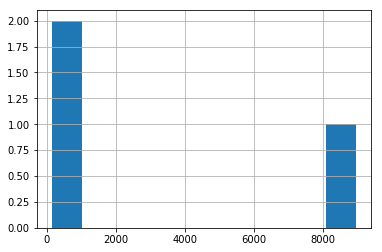

In [7]:
df_10k['offerReason'].value_counts().hist()

info: offerReason stads for the driving force behind the offer.
- Percentage --> the player was almost completed the level
- LevelTime --> the player spent a lot of time in this level.
- BoosterUsed --> the player already used some source of Boost(if they invested in this level they may try again upon failure).

Conclusion: Create dummy variables for each of the optuons which will signify the correltion between customer decisons.

***percentageLeft***

In [9]:
df_10k['percentageLeft'].head()

0     0
1     3
2     4
3    38
4     3
Name: percentageLeft, dtype: int64

In [13]:
df_10k['percentageLeft'].unique()   #negative percentage left?! ASK about the algoritm behind this.

array([  0,   3,   4,  38,   2,   7,  19,   1,   5,   6,   9,  35,   8,
        11,  15,  10,  17,  14,  27,  29,  22,  32,  13,  26,  23,  40,
        12,  39,  33,  21, 100,  20,  28,  18,  24,  30,  16,  45,  25,
        43,  44,  47,  34,  49,  31,  41,  -2,  50,  42,  88,  46,  85,
       -11,  37,  48,  71,  36,  -5,  61,  52])

In [15]:
df_10k['percentageLeft'].value_counts().head()

3    1154
1    1133
4    1129
7    1106
2    1103
Name: percentageLeft, dtype: int64

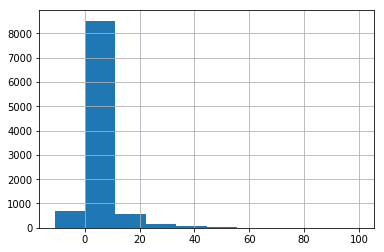

In [16]:
df_10k['percentageLeft'].hist()

info: 
- Gives us the percentage left at the point player failed. 
- There are some ***negative values**** 
-  Could be considered as a highly valuable column unless we already have the reason --> percentage as the triggering factor behidn the offer.
yet percentageleft as a reason tells us that the player was almost going to finish the level. I want to see if higher percentage left also leads to offers before I drop this column. 

conclusion: Include this feature in the model iff there is a correlation between target and high percentage rates.

***platform***

In [3]:
df_10k['platform'].head()

0    IOS
1    IOS
2    IOS
3    IOS
4    IOS
Name: platform, dtype: object

In [6]:
type(df_10k['platform'][0])  #type looks as if it is string yet dtype states that this is an object. Check the reasoning behind it.

str

In [8]:
df_10k['platform'].unique()   #Here is the reason folks! We have nan values within this column.

array(['IOS', 'Android', nan], dtype=object)

In [9]:
df_10k['platform'].value_counts()

Android    5076
IOS        4902
Name: platform, dtype: int64

As a reminder let me demonstrate couple of ways to find out if there are null or nan values in the column.

In [12]:
#notnull
pd.notnull(df_10k['platform']).unique()

array([ True, False])

In [15]:
pd.notnull(df_10k['platform']).value_counts()

True     9978
False      22
Name: platform, dtype: int64

In [18]:
22/9978  #only 0.0022 of this column is nan values. ratio is ~50/50 so I will randomly fill half of these nans with ios and rest with android.

0.00220485067147725

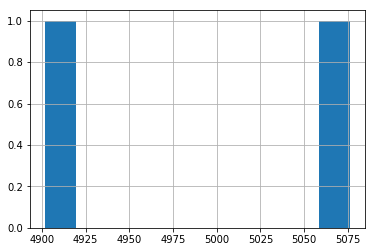

In [3]:
df_10k['platform'].value_counts().hist()

info:
- Platform shows if a player uses IOS or Android operating system(respect both please).
- I expect this piece of information to be highly critical because the cost of mobile  phones which operates under these systems has a significant difference which is likely to be correlated with disposable income. Regarding common sense, we can be highly confident that expendeture on entertainment industry is positively correlated with dissposable income.

Conclusion: create dummy variables or binary to show which players are usig one of the two operating systems within their phone.

***playTime***

In [4]:
df_10k['playTime'].head()

0    19
1    73
2    13
3    21
4    23
Name: playTime, dtype: int64

In [6]:
type(df_10k['playTime'][0])

numpy.int64

In [8]:
len(df_10k['playTime'].unique())

238

In [10]:
df_10k['playTime'].value_counts().head()

24    199
34    198
29    197
28    196
32    195
Name: playTime, dtype: int64

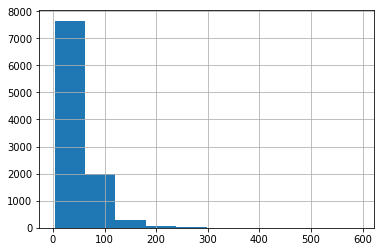

In [11]:
df_10k['playTime'].hist()

info:
- ***Not*** sure if this stands for the total playtime of player or the playtime in level. I believe this should be playtime for the level in which player got an offer. If that is the case I will raise the same argument that I raised for the percentageLeft since we have this column's information for higher playTimes in column called offereason.

conclusion:
-find if there is a correlation between low playtime with the player behaviour when it comes to decisions.

***playerId***

In [12]:
df_10k['playerId'].head()  #hash this!

0    58bac635569af004b035b6cb
1    58c7b5d9c1a7ac04b08754b6
2    58ba6e31569af004b02e51e9
3    58c7dda1c1a7ac04b0ff6f33
4    58c6d01d29b38504b5a73aa6
Name: playerId, dtype: object

In [15]:
type(df_10k['playerId'][0])   # aha! we probably have couple of null values. Lets have a look eh? 

str

In [17]:
pd.notnull(df_10k['playerId']).value_counts()

True    10000
Name: playerId, dtype: int64

In [19]:
pd.notnull(df_10k['playerId']).unique()  #interesting, I was WRONG. Ask why a complete string column can be classified as object type.

array([ True])

In [22]:
df_10k['playerId'].value_counts().head(10)  #Not surprised some players really enjoy this amazing game!

58c7d7ef0759d804b2326927    42
56c9ee11e4b04bca08dfd0e2    32
58c6c84a29b38504b5855931    28
57cc35f5465b6a04838b33eb    25
58c805fbc1a7ac04b088f1aa    23
58b97b6716330204b3ba181d    22
58c818a20759d804b2540357    18
575a5e591ac1ff04981f224d    17
56cb093ee4b05f81a364e4b9    16
57279c660646d104949ae97e    16
Name: playerId, dtype: int64

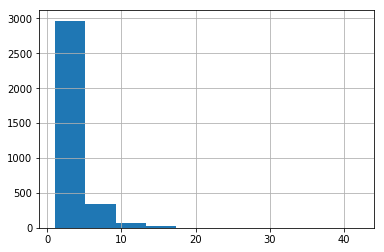

In [23]:
df_10k['playerId'].value_counts().hist()

info:
- playerID stands for number offers each player received. 
- Highly significant feature.
- HASH these ids!!!!!!!!!!!   reminder --> python has a hash function. yeey!

***result***

In [3]:
df_10k['result'].head()

0    reject
1    reject
2    reject
3    reject
4    reject
Name: result, dtype: object

In [4]:
type(df_10k['result'][0])

str

In [5]:
pd.notnull(df_10k['result']).value_counts()

True    10000
Name: result, dtype: int64

In [6]:
pd.notnull(df_10k['result']).unique()

array([ True])

In [7]:
df_10k['result'].value_counts()

reject     8684
bought      676
adWatch     640
Name: result, dtype: int64

In [8]:
df_10k['result'].unique()

array(['reject', 'bought', 'adWatch'], dtype=object)

In [9]:
print(type(df_10k['result'].unique()[0]))
print(type(df_10k['result'].unique()[1]))
print(type(df_10k['result'].unique()[2]))

<class 'str'>
<class 'str'>
<class 'str'>


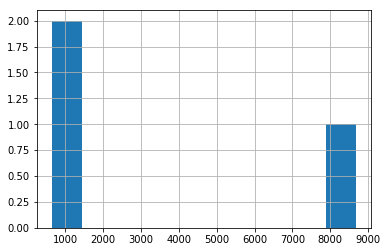

In [9]:
df_10k['result'].value_counts().hist()

info: 
- This column shows how the way player reacted to the offer(rejected, bought or watched add).
- Certainly this is our target becayse it is a success if player watchs adds or buys spends the coints.

Conclusion:
- As stated this column is our target yet I am not sure about the way to set is as a target since spending coin or watching adds leads to different revenue generation. 

***Disscuss this part with your instructors and collegues, also do some research. You need to come up with a confident clarification to this part before Nov 12!!!!***

Alternatives
- Bool the target
- Consider both watching add watch and spend coin options as success and take an average of the revenue generation.
- Consider both watching add watch and spend coin options as success and use weighted average of the revenue generation.

I think we may miss the actual essence of the target we want to reach if we simply follow the bool option, so find something else. If you fail, go with the bool option. Also, don't fail...

***segments***

In [10]:
df_10k['segments'].head()

0    {'IAP': 'false', 'ISG_PBS_Price': 'Low', 'ISG_...
1    {'IAP': 'false', 'ISG_PBS_Price': 'Low', 'ISG_...
2    {'IAP': 'false', 'ISG_PBS_Price': 'High', 'ISG...
3    {'IAP': 'false', 'ISG_PBS_Price': 'Low', 'ISG_...
4    {'IAP': 'false', 'ISG_PBS_Price': 'High', 'ISG...
Name: segments, dtype: object

In [11]:
df_10k['segments'][0]

"{'IAP': 'false', 'ISG_PBS_Price': 'Low', 'ISG_SaveMe_Max_Percentage': 'Mid', 'ISG_EnergyRefill': 'Low', 'Country': 'SA', 'LanguageCode': 'en'}"

In [12]:
type(df_10k['segments'][0])

str

In [18]:
pd.notnull(df_10k['segments']).unique()

array([ True])

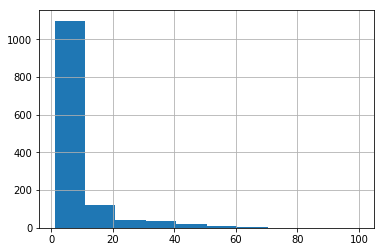

In [16]:
df_10k['segments'].value_counts().hist()

info:
- segments column includes segment information about a variety of different features such as: 
features: IAP,ISG_PBS_Price,ISG_SaveMe_Max_Percentage,ISG_EnergyRefill,Country,LanguageCode

Conclusion:
There is a lot of work to do here. I need to create new columns about these features which will then be data engineered once again. 
Use the syntax to convert strings to dictionary. Then pull the right answers from the dictionary to find if any of the features are important.

***sessions***

In [20]:
df_10k['sessions'].head()

0    25
1     5
2    36
3     3
4     4
Name: sessions, dtype: int64

In [22]:
type(df_10k['sessions'][0])

numpy.int64

In [31]:
df_10k['sessions'].value_counts().head(10)

1     974
2     596
3     491
4     482
6     343
5     325
7     293
8     209
9     203
11    160
Name: sessions, dtype: int64

In [28]:
(df_10k['sessions'] < 0).unique()  # Looks like we have some negative sessions here. Thats a problem to fix.

array([False,  True])

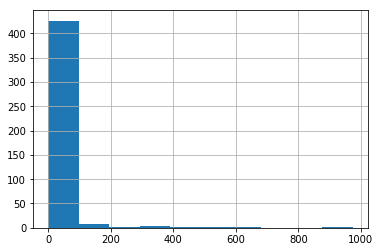

In [30]:
df_10k['sessions'].value_counts().hist()  # some consiredably high numbers whereas most sessions concentrated between 1 and 100.

info:
- ***not sure*** about what sessions state. Probably stands for the session that the offer is made.

Conclusion: 
- slice sessions within different ranges and create dummy variables for each range.

***ts =? timeseries****

In [32]:
df_10k['ts'].head()

0    {'$date': {'$numberLong': '1489505171825'}}
1    {'$date': {'$numberLong': '1489505173200'}}
2    {'$date': {'$numberLong': '1489505174598'}}
3    {'$date': {'$numberLong': '1489505176848'}}
4    {'$date': {'$numberLong': '1489505177077'}}
Name: ts, dtype: object

In [33]:
type(df_10k['ts'][0])

str

In [35]:
pd.isnull(df_10k['ts']).unique() 

array([False])

In [37]:
 len(df_10k['ts'].unique())  # some duplicates.

9987

In [44]:
df_10k['ts'].value_counts().unique()

array([2, 1])

info:
- Each row includes a dictionary of dictionary which leads to a single string number value ultimately. 
- There are 13 duplicate dictionaries compared to 9987 unique rows. Luckily such a small ratio.
- I need to ***be sure*** about the interpretation of this number. My assumption is this is a the count since 1970.

Conclusion:
- Pull the number out of both dictionaries and create a new column for the time count.
- Transform the count to a more interpretable format such as days or weeks.


***twentileLeft***

In [46]:
df_10k['twentileLeft'].head()

0    0
1    0
2    0
3    7
4    0
Name: twentileLeft, dtype: int64

In [47]:
df_10k['twentileLeft']. value_counts()  #some negative values once again.

 0     5194
 1     3705
 2      579
 3      208
 4      117
 5       67
 6       36
 8       27
 7       27
 9       18
 20      10
-1        4
 10       3
 17       2
-3        1
 12       1
 14       1
Name: twentileLeft, dtype: int64

In [48]:
df_10k['twentileLeft'].unique()

array([ 0,  7,  1,  3,  2,  5,  4,  6,  8, 20,  9, -1, 10, 17, -3, 14, 12])

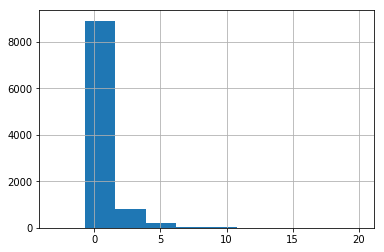

In [45]:
df_10k['twentileLeft'].hist()

info:
- This is certainly an ingame terminalogy to define the number of twentile's that left at the moment of offer. ***learn it***

Conclusion:
- Upon learning what twentile stands for (1)create dummy variables for each (2) slice them within different ranges based on the meaning of the terminology. 
- Se those negative values to 0 or the median of the set.

***end of step_2_data_engine_part_1***


I discussed the pathway to follow about each column. Now it is time to start actual data engineering as I generate transform functions for each case. 

**To Do**
- Play the game in order have a better idea about the features. (yey!)
- Call developers and ask your questions about each feature that have a vauge meaning.
- Start working on functions and generate a more comprehensive dataframe which will include new features. 
- reminder : you need to dataengineer segment dictionaries as well and take notes about each feature which will be added to step_2_data_engine_part_1.